In [1]:
import tensorflow_decision_forests as tfdf

2024-02-26 13:30:55.209449: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-26 13:30:55.252724: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-26 13:30:55.252774: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-26 13:30:55.254344: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-26 13:30:55.262837: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-26 13:30:55.263734: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
from os.path import join

In [3]:
# Check the version of TensorFlow Decision Forests
print("Found TensorFlow Decision Forests v" + tfdf.__version__)

Found TensorFlow Decision Forests v1.8.1


In [4]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import math

In [5]:
# Check the version of TensorFlow Decision Forests
print("Found TensorFlow v" + tf.__version__)

Found TensorFlow v2.15.0


In [6]:
drop_list    =  ['3DPFNPs - 5.0µg/mL', 
                 '3DPFNPs - 1.25µg/mL', 
                 '3DPFNPs - 0.625µg/mL', 
                 #'3DPFNPs - 0.313µg/mL', 
                 '3DPFNPs - 0.156µg/mL', 
                 'DMSO - 0.1%']

In [7]:
def plate(plate_number):

    plate_sets = [f'CP211103AIAC01_field_level_normalized.csv',
                  f'CP211202AIAC06_field_level_normalized.csv',
                  f'CP211222ANHI01_field_level_normalized.csv']
    
    data_dir = f'Nanoparticles'
    
    plate_df = pd.read_csv(join(data_dir, plate_sets[plate_number]), 
                           index_col = [0], 
                           header= [0,1],
                           low_memory=False)
    
    plate_df.columns = ['_'.join(map(str, x)) for x in plate_df.columns]
    plate_df.index.name='Treatment_info'
    plate_df = plate_df.drop(drop_list)
    plate_df = plate_df.reset_index()
    return plate_df

In [8]:
plate_0_df = plate(0) #CP211103AIAC01
plate_1_df = plate(1) #CP211202AIAC06
plate_2_df = plate(2) #CP211222ANHI01

In [9]:
plate_0_df

Treatment_info  Cells_AreaShape_Area  \
0    3DPFNPs - 100.0µg/mL              0.182555   
1    3DPFNPs - 100.0µg/mL              0.082630   
2    3DPFNPs - 100.0µg/mL              0.228732   
3    3DPFNPs - 100.0µg/mL              0.151139   
4    3DPFNPs - 100.0µg/mL              0.218134   
..                    ...                   ...   
264  3DPFNPs - 0.313µg/mL             -0.102080   
265  3DPFNPs - 0.313µg/mL              0.231760   
266  3DPFNPs - 0.313µg/mL              0.065976   
267  3DPFNPs - 0.313µg/mL              0.097770   
268  3DPFNPs - 0.313µg/mL              0.360452   

     Cells_AreaShape_BoundingBoxArea  Cells_AreaShape_BoundingBoxMaximum_X  \
0                           0.157154                              0.069645   
1                           0.069891                              0.083670   
2                           0.219459                              0.058856   
3                           0.085376                              0.188318   
4                           0.252069                              0.049147   
..                               ...                                   ...   
264                        -0.099900                             -0.033925   
265                         0.195411                             -0.061975   
266                        -0.001523                              0.040516   
267                         0.117804                              0.035122   
268                         0.336053                              0.046989   

     Cells_AreaShape_BoundingBoxMaximum_Y  \
0                                0.073270   
1                                0.008612   
2                                0.088878   
3                                0.047630   
4                               -0.199856   
..                                    ...   
264                             -0.043784   
265                              0.024219   
266                              0.101140   
267                              0.017530   
268                              0.017530   

     Cells_AreaShape_BoundingBoxMinimum_X  \
0                                0.031161   
1                                0.082285   
2                                0.041386   
3                                0.146702   
4                                0.033206   
..                                    ...   
264                             -0.004626   
265                             -0.083357   
266                              0.035251   
267                              0.031161   
268                              0.026049   

     Cells_AreaShape_BoundingBoxMinimum_Y  Cells_AreaShape_Center_X  \
0                                0.058550                  0.043229   
1                                0.016291                  0.087114   
2                                0.102820                  0.048968   
3                                0.049494                  0.172469   
4                               -0.184939                  0.043989   
..                                    ...                       ...   
264                             -0.041059                 -0.015717   
265                             -0.005844                 -0.072722   
266                              0.051507                  0.041713   
267                              0.016291                  0.036241   
268                              0.005224                  0.045011   

     Cells_AreaShape_Center_Y  Cells_AreaShape_Compactness  ...  \
0                    0.066403                    -0.097706  ...   
1                    0.015219                    -0.037796  ...   
2                    0.084238                    -0.052476  ...   
3                    0.042875                    -0.095671  ...   
4                   -0.188693                     0.133491  ...   
..                        ...                          ...  ...   
264                 -0.034121                     0.23850

In [10]:
label = "Treatment_info"

classes = plate_0_df[label].unique().tolist()
print(f"Label classes: {classes}")

Label classes: ['3DPFNPs - 100.0µg/mL', '3DPFNPs - 50.0µg/mL', '3DPFNPs - 25.0µg/mL', '3DPFNPs - 2.5µg/mL', '3DPFNPs - 0.313µg/mL']


In [11]:
plate_0_df[label] = plate_0_df[label].map(classes.index)
plate_1_df[label] = plate_1_df[label].map(classes.index)
plate_2_df[label] = plate_2_df[label].map(classes.index)

### split 1: 
CP211103AIAC01 - test;
CP211202AIAC06, CP211222ANHI01 - train;

In [12]:
train_ds_pd = pd.concat([plate_1_df, plate_2_df])

test_ds_pd = plate_0_df

In [13]:
print(f"Test classes: {test_ds_pd[label].unique().tolist()}")
print(f"Train classes: {test_ds_pd[label].unique().tolist()}")


Test classes: [0, 1, 2, 3, 4]
Train classes: [0, 1, 2, 3, 4]


In [14]:
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_ds_pd, label=label)

In [15]:
# Specify the model.
model_1 = tfdf.keras.RandomForestModel(verbose=2)

# Train the model.
model_1.fit(train_ds)

Use 8 thread(s) for training
Use /tmp/tmpsszsvx1k as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'Cells_AreaShape_Area': <tf.Tensor 'data:0' shape=(None,) dtype=float64>, 'Cells_AreaShape_BoundingBoxArea': <tf.Tensor 'data_1:0' shape=(None,) dtype=float64>, 'Cells_AreaShape_BoundingBoxMaximum_X': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'Cells_AreaShape_BoundingBoxMaximum_Y': <tf.Tensor 'data_3:0' shape=(None,) dtype=float64>, 'Cells_AreaShape_BoundingBoxMinimum_X': <tf.Tensor 'data_4:0' shape=(None,) dtype=float64>, 'Cells_AreaShape_BoundingBoxMinimum_Y': <tf.Tensor 'data_5:0' shape=(None,) dtype=float64>, 'Cells_AreaShape_Center_X': <tf.Tensor 'data_6:0' shape=(None,) dtype=float64>, 'Cells_AreaShape_Center_Y': <tf.Tensor 'data_7:0' shape=(None,) dtype=float64>, 'Cells_AreaShape_Compactness': <tf.Tensor 'data_8:0' shape=(None,) dtype=float64>, 'Cells_AreaShape_Eccentricity': <tf.Tensor 'data_9:0' shape=(None,) dtype=float64

[INFO 24-02-26 13:31:44.8504 CET kernel.cc:771] Start Yggdrasil model training
[INFO 24-02-26 13:31:44.8508 CET kernel.cc:772] Collect training examples
[INFO 24-02-26 13:31:44.8508 CET kernel.cc:785] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 24-02-26 13:31:44.8597 CET kernel.cc:391] Number of batches: 1
[INFO 24-02-26 13:31:44.8597 CET kernel.cc:392] Number of examples: 539
[INFO 24-02-26 13:31:44.8799 CET kernel.cc:792] Training dataset:
Number of records: 539
Number of columns: 3411

Number of columns by type:
	NUMERICAL: 3410 (99.9707%)
	CATEGORICAL: 1 (0.0293169%)

Columns:

NUMERICAL: 3410 (99.9707%)
	0: "Cells_AreaShape_Area" NUMERICAL mean:0.017535

Model trained in 0:00:06.183736
Compiling model...
Model compiled.


In [16]:
model_1.compile(metrics=["accuracy"])
evaluation = model_1.evaluate(test_ds, return_dict=True)
print()

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 8s 8s/step - loss: 0.0000e+00 - accuracy: 0.6134

loss: 0.0000
accuracy: 0.6134


In [17]:
#model_1.summary()


In [18]:
model_1.make_inspector().training_logs()

[TrainLog(num_trees=1, evaluation=Evaluation(num_examples=193, accuracy=0.6580310880829016, loss=12.325808312608787, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=11, evaluation=Evaluation(num_examples=535, accuracy=0.7158878504672898, loss=3.661682879813364, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=21, evaluation=Evaluation(num_examples=539, accuracy=0.7291280148423006, loss=1.8130271875183746, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=31, evaluation=Evaluation(num_examples=539, accuracy=0.7495361781076066, loss=0.9342589784752239, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=41, evaluation=Evaluation(num_examples=539, accuracy=0.764378478664193, loss=0.7337680770661371, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=51, evaluation=Evaluation(num_examples=539, accuracy=0.7792207792207793, loss=0.6653209022956457, rmse=None,

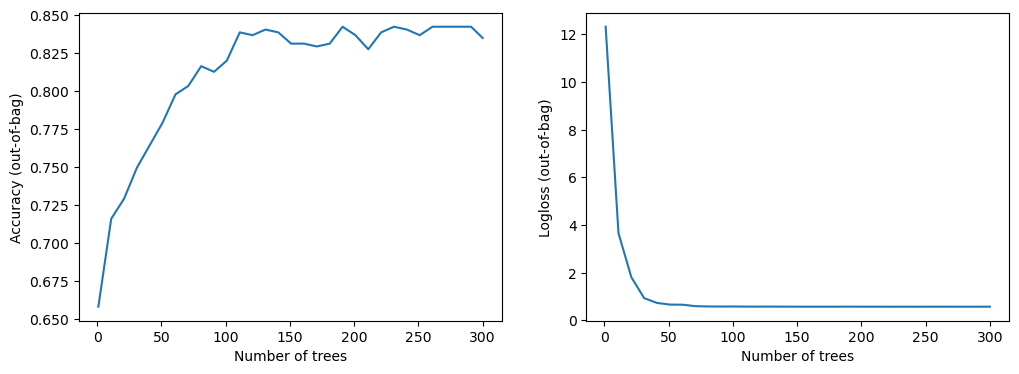

In [19]:
import matplotlib.pyplot as plt

logs = model_1.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss (out-of-bag)")

plt.show()

In [20]:
del model_1, train_ds, test_ds

### split 2: 


In [21]:
train_ds_pd = pd.concat([plate_0_df, plate_2_df])

test_ds_pd = plate_1_df

In [22]:
print(f"Test classes: {test_ds_pd[label].unique().tolist()}")
print(f"Train classes: {test_ds_pd[label].unique().tolist()}")


Test classes: [0, 1, 2, 3, 4]
Train classes: [0, 1, 2, 3, 4]


In [23]:
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_ds_pd, label=label)

In [24]:
# Specify the model.
model_1 = tfdf.keras.RandomForestModel(verbose=2)

# Train the model.
model_1.fit(train_ds)

Use 8 thread(s) for training
Use /tmp/tmp79jdjz1d as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'Cells_AreaShape_Area': <tf.Tensor 'data:0' shape=(None,) dtype=float64>, 'Cells_AreaShape_BoundingBoxArea': <tf.Tensor 'data_1:0' shape=(None,) dtype=float64>, 'Cells_AreaShape_BoundingBoxMaximum_X': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'Cells_AreaShape_BoundingBoxMaximum_Y': <tf.Tensor 'data_3:0' shape=(None,) dtype=float64>, 'Cells_AreaShape_BoundingBoxMinimum_X': <tf.Tensor 'data_4:0' shape=(None,) dtype=float64>, 'Cells_AreaShape_BoundingBoxMinimum_Y': <tf.Tensor 'data_5:0' shape=(None,) dtype=float64>, 'Cells_AreaShape_Center_X': <tf.Tensor 'data_6:0' shape=(None,) dtype=float64>, 'Cells_AreaShape_Center_Y': <tf.Tensor 'data_7:0' shape=(None,) dtype=float64>, 'Cells_AreaShape_Compactness': <tf.Tensor 'data_8:0' shape=(None,) dtype=float64>, 'Cells_AreaShape_Eccentricity': <tf.Tensor 'data_9:0' shape=(None,) dtype=float64

[INFO 24-02-26 13:32:57.2441 CET kernel.cc:771] Start Yggdrasil model training
[INFO 24-02-26 13:32:57.2441 CET kernel.cc:772] Collect training examples
[INFO 24-02-26 13:32:57.2441 CET kernel.cc:785] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 24-02-26 13:32:57.2526 CET kernel.cc:391] Number of batches: 1
[INFO 24-02-26 13:32:57.2526 CET kernel.cc:392] Number of examples: 538
[INFO 24-02-26 13:32:57.2725 CET kernel.cc:792] Training dataset:
Number of records: 538
Number of columns: 3411

Number of columns by type:
	NUMERICAL: 3410 (99.9707%)
	CATEGORICAL: 1 (0.0293169%)

Columns:

NUMERICAL: 3410 (99.9707%)
	0: "Cells_AreaShape_Area" NUMERICAL mean:0.049086

Model trained in 0:00:06.124301
Compiling model...
Model compiled.


In [25]:
model_1.compile(metrics=["accuracy"])
evaluation = model_1.evaluate(test_ds, return_dict=True)
print()

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 8s 8s/step - loss: 0.0000e+00 - accuracy: 0.5815

loss: 0.0000
accuracy: 0.5815


In [26]:
#model_1.summary()

In [27]:
#model_1.make_inspector().training_logs()

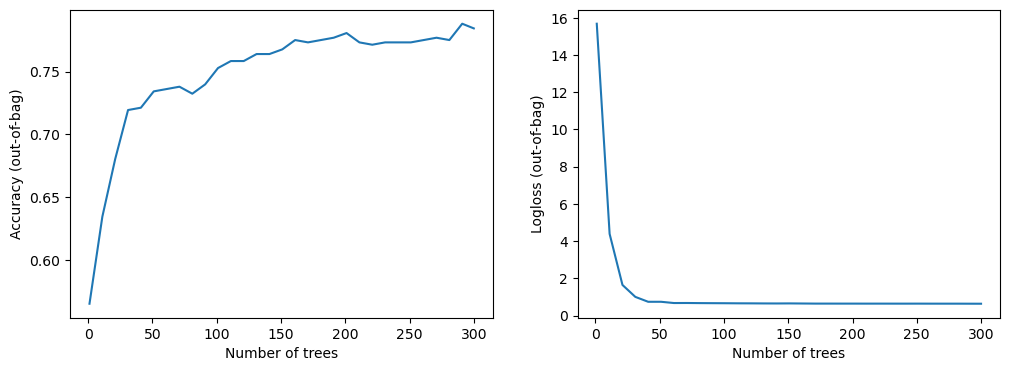

In [28]:
import matplotlib.pyplot as plt

logs = model_1.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss (out-of-bag)")

plt.show()

In [29]:
del model_1, train_ds, test_ds

### split 3: 


In [30]:
train_ds_pd = pd.concat([plate_1_df, plate_0_df])

test_ds_pd = plate_2_df

In [31]:
print(f"Test classes: {test_ds_pd[label].unique().tolist()}")
print(f"Train classes: {test_ds_pd[label].unique().tolist()}")


Test classes: [0, 1, 2, 3, 4]
Train classes: [0, 1, 2, 3, 4]


In [32]:
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_ds_pd, label=label)

In [33]:
# Specify the model.
model_1 = tfdf.keras.RandomForestModel(verbose=2)

# Train the model.
model_1.fit(train_ds)

Use 8 thread(s) for training
Use /tmp/tmp4heyuanv as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'Cells_AreaShape_Area': <tf.Tensor 'data:0' shape=(None,) dtype=float64>, 'Cells_AreaShape_BoundingBoxArea': <tf.Tensor 'data_1:0' shape=(None,) dtype=float64>, 'Cells_AreaShape_BoundingBoxMaximum_X': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'Cells_AreaShape_BoundingBoxMaximum_Y': <tf.Tensor 'data_3:0' shape=(None,) dtype=float64>, 'Cells_AreaShape_BoundingBoxMinimum_X': <tf.Tensor 'data_4:0' shape=(None,) dtype=float64>, 'Cells_AreaShape_BoundingBoxMinimum_Y': <tf.Tensor 'data_5:0' shape=(None,) dtype=float64>, 'Cells_AreaShape_Center_X': <tf.Tensor 'data_6:0' shape=(None,) dtype=float64>, 'Cells_AreaShape_Center_Y': <tf.Tensor 'data_7:0' shape=(None,) dtype=float64>, 'Cells_AreaShape_Compactness': <tf.Tensor 'data_8:0' shape=(None,) dtype=float64>, 'Cells_AreaShape_Eccentricity': <tf.Tensor 'data_9:0' shape=(None,) dtype=float64

[INFO 24-02-26 13:34:25.5996 CET kernel.cc:771] Start Yggdrasil model training
[INFO 24-02-26 13:34:25.5996 CET kernel.cc:772] Collect training examples
[INFO 24-02-26 13:34:25.5996 CET kernel.cc:785] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 24-02-26 13:34:25.6081 CET kernel.cc:391] Number of batches: 1
[INFO 24-02-26 13:34:25.6081 CET kernel.cc:392] Number of examples: 539
[INFO 24-02-26 13:34:25.6282 CET kernel.cc:792] Training dataset:
Number of records: 539
Number of columns: 3411

Number of columns by type:
	NUMERICAL: 3410 (99.9707%)
	CATEGORICAL: 1 (0.0293169%)

Columns:

NUMERICAL: 3410 (99.9707%)
	0: "Cells_AreaShape_Area" NUMERICAL mean:0.084308

Model trained in 0:00:05.474683
Compiling model...
Model compiled.


In [34]:
model_1.compile(metrics=["accuracy"])
evaluation = model_1.evaluate(test_ds, return_dict=True)
print()

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 8s 8s/step - loss: 0.0000e+00 - accuracy: 0.3494

loss: 0.0000
accuracy: 0.3494


In [35]:
#model_1.summary()

In [36]:
#model_1.make_inspector().training_logs()

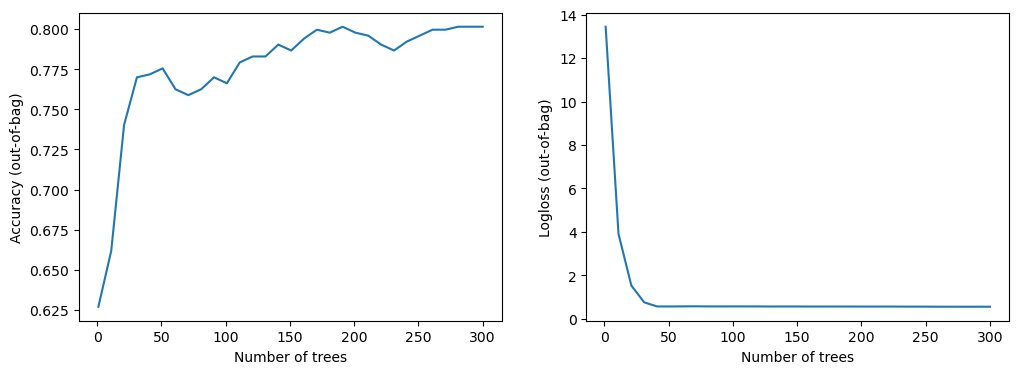

In [37]:
import matplotlib.pyplot as plt

logs = model_1.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss (out-of-bag)")

plt.show()

In [38]:
del model_1, train_ds, test_ds

### split 4: 


In [46]:
train_ds_pd = plate_1_df

test_ds_pd = plate_0_df

In [47]:
print(f"Test classes: {test_ds_pd[label].unique().tolist()}")
print(f"Train classes: {test_ds_pd[label].unique().tolist()}")


Test classes: [0, 1, 2, 3, 4]
Train classes: [0, 1, 2, 3, 4]


In [48]:
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_ds_pd, label=label)

In [49]:
# Specify the model.
model_1 = tfdf.keras.RandomForestModel(verbose=2)

# Train the model.
model_1.fit(train_ds)

Use 8 thread(s) for training
Use /tmp/tmpfu6l6kjs as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'Cells_AreaShape_Area': <tf.Tensor 'data:0' shape=(None,) dtype=float64>, 'Cells_AreaShape_BoundingBoxArea': <tf.Tensor 'data_1:0' shape=(None,) dtype=float64>, 'Cells_AreaShape_BoundingBoxMaximum_X': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'Cells_AreaShape_BoundingBoxMaximum_Y': <tf.Tensor 'data_3:0' shape=(None,) dtype=float64>, 'Cells_AreaShape_BoundingBoxMinimum_X': <tf.Tensor 'data_4:0' shape=(None,) dtype=float64>, 'Cells_AreaShape_BoundingBoxMinimum_Y': <tf.Tensor 'data_5:0' shape=(None,) dtype=float64>, 'Cells_AreaShape_Center_X': <tf.Tensor 'data_6:0' shape=(None,) dtype=float64>, 'Cells_AreaShape_Center_Y': <tf.Tensor 'data_7:0' shape=(None,) dtype=float64>, 'Cells_AreaShape_Compactness': <tf.Tensor 'data_8:0' shape=(None,) dtype=float64>, 'Cells_AreaShape_Eccentricity': <tf.Tensor 'data_9:0' shape=(None,) dtype=float64

Training dataset read in 0:00:33.815716. Found 270 examples.
Training model...


[INFO 24-02-26 14:17:06.2614 CET kernel.cc:771] Start Yggdrasil model training
[INFO 24-02-26 14:17:06.2614 CET kernel.cc:772] Collect training examples
[INFO 24-02-26 14:17:06.2614 CET kernel.cc:785] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 24-02-26 14:17:06.2702 CET kernel.cc:391] Number of batches: 1
[INFO 24-02-26 14:17:06.2702 CET kernel.cc:392] Number of examples: 270
[INFO 24-02-26 14:17:06.2831 CET kernel.cc:792] Training dataset:
Number of records: 270
Number of columns: 3411

Number of columns by type:
	NUMERICAL: 3410 (99.9707%)
	CATEGORICAL: 1 (0.0293169%)

Columns:

NUMERICAL: 3410 (99.9707%)
	0: "Cells_AreaShape_Area" NUMERICAL mean:0.052750

Model trained in 0:00:03.012202
Compiling model...


Model compiled.


In [50]:
model_1.compile(metrics=["accuracy"])
evaluation = model_1.evaluate(test_ds, return_dict=True)
print()

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 9s 9s/step - loss: 0.0000e+00 - accuracy: 0.5353

loss: 0.0000
accuracy: 0.5353


In [35]:
#model_1.summary()

In [36]:
#model_1.make_inspector().training_logs()

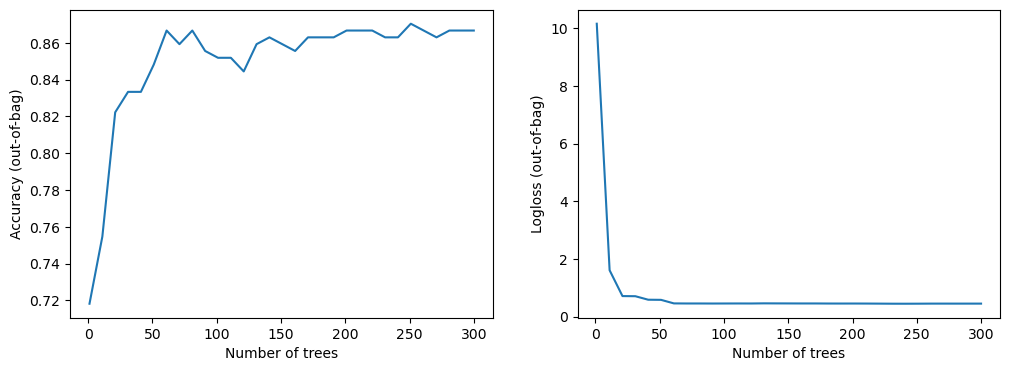

In [51]:
import matplotlib.pyplot as plt

logs = model_1.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss (out-of-bag)")

plt.show()

In [52]:
del model_1, train_ds, test_ds